In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy import pi as p 
from numpy import exp as e
import mpmath as mp
from mpmath import nsum, inf

In [ ]:
#Exemplo Roteiro
# N é o número de intervalos de domínio
# k_final é o número de passos de tempo desejado para análise
# L é o tamanho da barra

N =10
k_final = [10,20,30,40,50]
k_final = np.array(k_final)
L = 1
x = np.linspace(0.0,L,N+1)
delta_x = L/N
delta_t = 0.2*(delta_x**2)
#Definindo a Matriz de temperatura
Temperatura = np.zeros(N+1, float)
Resultado = np.zeros(len(k_final),list)
Temperatura[N] = 1.0
Temperatura_Nova = np.copy(Temperatura)

for j in range(0, len(k_final)):
  for k in range(1, k_final[j] + 1):
    for i in range(1,N):
      Temperatura_Nova[i] = Temperatura[i] + (delta_t/(delta_x**2))*(Temperatura[i+1] - 2.0*Temperatura[i] + Temperatura[i - 1])
    Temperatura = np.copy(Temperatura_Nova)
  t = k*(delta_t)
  Resultado[j] = Temperatura


IndexError: ignored

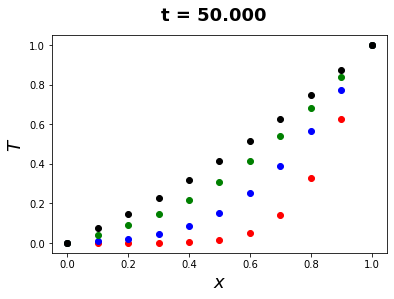

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['or','ob','og','ok']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x, Resultado[i],line_style[i], lw = 4)

plt.show()


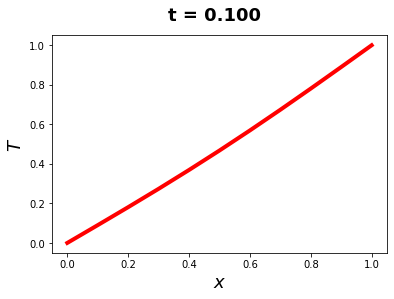

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('t = %.3f'%t, fontsize =18, fontweight = 'bold')
ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

plt.plot(x, Temperatura, '-r', lw = 4)
plt.show()

IndexError: ignored

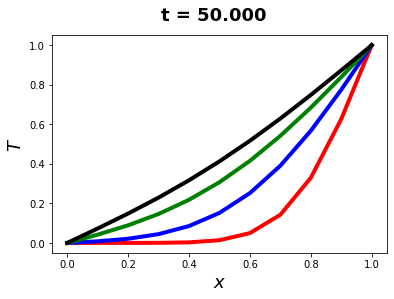

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['-r','-b','-g','-k']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x, Resultado[i],line_style[i], lw = 4)

plt.show()


In [26]:
#Exercício 1 e Exercício 4
N =100
L = 1
x = np.linspace(0.0,L,N+1)
delta_x = L/N
delta_t = 0.2*(delta_x**2)
k_final = [1,40,60,200]
#Definindo a Matriz de temperatura
Temperatura = np.zeros(N+1, float)
Resultado = np.zeros(len(k_final),list)
#Primeiro passo de tempo, pois temos que o primeiro elemento da nossa matriz de temperatura é igual a 1, isto é t = 0. 
#Nesse laço, para i dentro do range de 0 até N-1, que exclui o último ponto, indo sempre de 0 até N.
#Definimos toda a matriz de temperatura a partir da condição inicial, excluindo o último ponto do domínio, que é o final. 
#Equivalente a escrever o np.ones()
for i in range(0,N-1):
  Temperatura[i] = 1.0

Temperatura_Nova = np.copy(Temperatura)

for j in range(0, len(k_final)):
  for k in range(1, k_final[j] + 1):
    for i in range(1,N):
      Temperatura_Nova[i] = Temperatura[i] + (delta_t/(delta_x**2))\
                                          *(Temperatura[i+1] - 2.0*Temperatura[i] + Temperatura[i - 1])
      Temperatura = np.copy(Temperatura_Nova)
  t = k*(delta_t)
  print("Temperatura no tempo {}:{}".format(t,Temperatura))
  Resultado[j] = Temperatura

Temperatura no tempo 2e-05:[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 0.8  0.16 0.  ]
Temperatura no tempo 0.0008:[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       

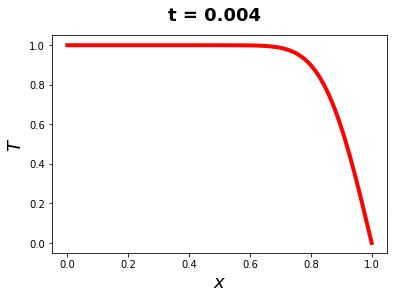

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('t = %.3f'%t, fontsize =18, fontweight = 'bold')
ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

plt.plot(x, Temperatura, '-r', lw = 4)
plt.show()

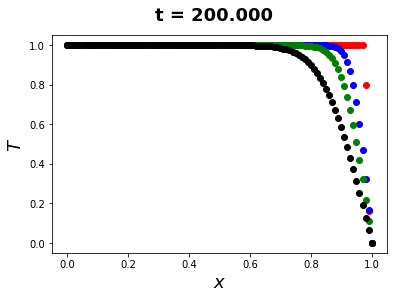

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['or','ob','og','ok']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)
for i in range(len(Resultado)):
  plt.plot(x, Resultado[i],line_style[i], lw = 4)

plt.show()

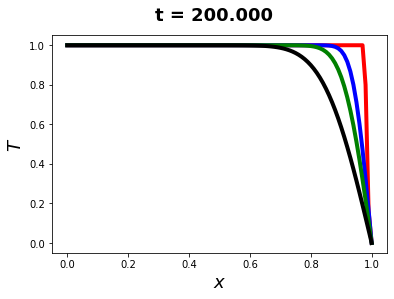

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['-r','-b','-g','-k']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x,Resultado[i],line_style[i], lw = 4)

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['or','ob','og','ok']
line_continuos = ['-r','-b','-g','-k']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x, Resultado[i],line_style[i], lw = 4)
  plt.plot(x,Resultado[i], line_continuos[i])
plt.show()

In [29]:
#Exercício 2 e Exercício 5
N =100
k_final = [10,50,90,130]
L = 1
x = np.linspace(0.0,L,N+1)
delta_x = L/N
delta_t = 0.2*(delta_x**2)
#Definindo a Matriz de temperatura
Temperatura = np.zeros(N+1, float)
Resultado = np.zeros(len(k_final),list)
#Aqui a temperatura no inicio do domínio, isto é, N = 0 é igual a 1, logo definimos a matriz de temperatura no ponto 0 como igual a 1
Temperatura[0] = 1.0
Temperatura_Nova = np.copy(Temperatura)
#O primeiro for salva os passos de tempo, já o segundo os contabiliza
for j in range(0, len(k_final)):
  for k in range(1, k_final[j] + 1):
    for i in range(1,N):
      Temperatura_Nova[i] = Temperatura[i] + (delta_t/(delta_x**2))*(Temperatura[i+1] - 2.0*Temperatura[i] + Temperatura[i - 1])
    Temperatura = np.copy(Temperatura_Nova)
  t = k*(delta_t)
  Resultado[j] = Temperatura
  print(Temperatura)

[1.00000000e+00 6.26181530e-01 3.29289626e-01 1.42427546e-01
 4.96746496e-02 1.36701952e-02 2.88839680e-03 4.50764800e-04
 4.88448000e-05 3.27680000e-06 1.02400000e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

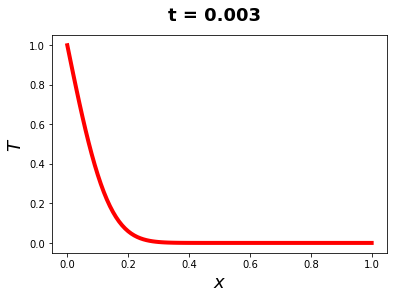

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('t = %.3f'%t, fontsize =18, fontweight = 'bold')
ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

plt.plot(x, Temperatura, '-r', lw = 4)
plt.show()

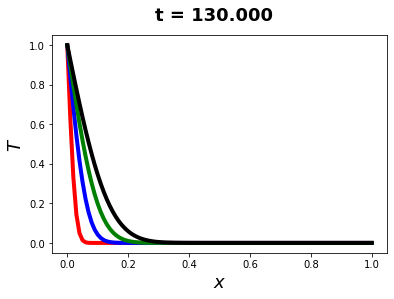

In [ ]:
#Gráfico continuo para vários passos de tempo
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['-r','-b','-g','-k']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x,Resultado[i],line_style[i], lw = 4)

plt.show()

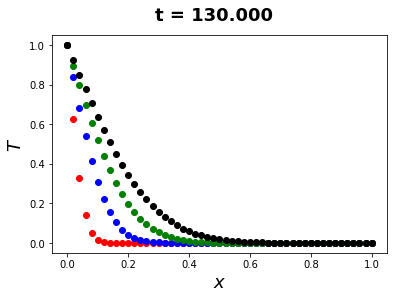

In [ ]:
#Gráfico pontilhado para vários passos de tempo
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['or','ob','og','ok']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')
  
ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x, Resultado[i],line_style[i], lw = 4)
  
plt.show()


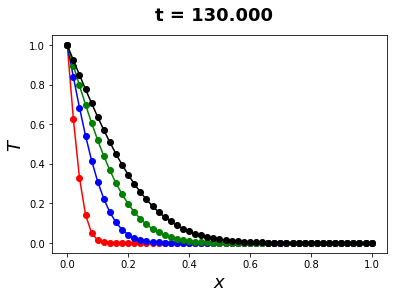

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['or','ob','og','ok']
line_continuos = ['-r','-b','-g','-k']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x, Resultado[i],line_style[i], lw = 4)
  plt.plot(x,Resultado[i], line_continuos[i])
plt.show()

In [ ]:
#Exercício 3 
N =100
L = 2
x = np.linspace(0.0,L,N+1)
delta_x = L/N
delta_t = 0.2*(delta_x**2)
k_final = [10,50,90,130]
#Definindo a Matriz de temperatura
Temperatura = np.zeros(N+1, float)
Resultado = np.zeros(len(k_final),list)
#Primeiro passo de tempo, pois temos que o primeiro elemento da nossa matriz de temperatura é igual a 1, isto é t = 0. 
#Nesse laço, para i dentro do range de 0 até N-1, que exclui o último ponto, indo sempre de 0 até N.
#Definimos toda a matriz de temperatura a partir da condição inicial, excluindo o último ponto do domínio, que é o final. 
#Equivalente a escrever o np.ones()
for i in range(0,N-1):
  Temperatura[i] = np.sin((p/2)*x[i])
Temperatura_Nova = np.copy(Temperatura)

for j in range(0, len(k_final)):
  for k in range(1, k_final[j] + 1):
    for i in range(1,N):
      Temperatura_Nova[i] = Temperatura[i] + (delta_t/(delta_x**2))\
                                          *(Temperatura[i+1] - 2.0*Temperatura[i] + Temperatura[i - 1])
      Temperatura = np.copy(Temperatura_Nova)
  t = k*(delta_t)
  print("Temperatura no tempo {}:{}".format(t,Temperatura))
  Resultado[j] = Temperatura

Temperatura no tempo 0.0008:[0.         0.03134301 0.06265056 0.09389367 0.12504275 0.15606777
 0.18693846 0.21762455 0.24809582 0.27832222 0.30827395 0.33792145
 0.36723546 0.39618705 0.42474765 0.45288908 0.48058357 0.50780377
 0.53452283 0.56071438 0.58635258 0.61141212 0.63586826 0.65969689
 0.68287447 0.70537813 0.72718567 0.74827557 0.76862701 0.78821991
 0.80703493 0.82505351 0.84225785 0.85863099 0.87415677 0.88881985
 0.90260578 0.91550095 0.92749263 0.93856898 0.94871908 0.95793291
 0.96620137 0.97351631 0.97987051 0.98525769 0.98967255 0.99311071
 0.9955688  0.99704438 0.99753599 0.99704316 0.99556637 0.99310708
 0.9896677  0.98525165 0.97986327 0.97350788 0.96619176 0.95792213
 0.94870714 0.93855589 0.9274784  0.9154856  0.90258933 0.88880231
 0.87413815 0.85861132 0.84223714 0.82503178 0.80701221 0.78819622
 0.76860238 0.74825001 0.72715922 0.7053508  0.68284629 0.65966789
 0.63583848 0.61138158 0.58632131 0.56068242 0.5344902  0.5077705
 0.4805497  0.45285465 0.42471268 0

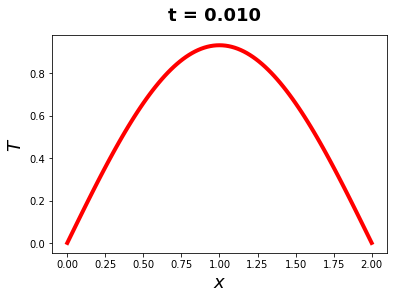

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('t = %.3f'%t, fontsize =18, fontweight = 'bold')
ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

plt.plot(x, Temperatura, '-r', lw = 4)
plt.show()

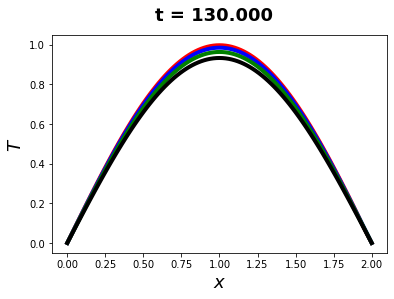

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['-r','-b','-g','-k']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x,Resultado[i],line_style[i], lw = 4)

plt.show()

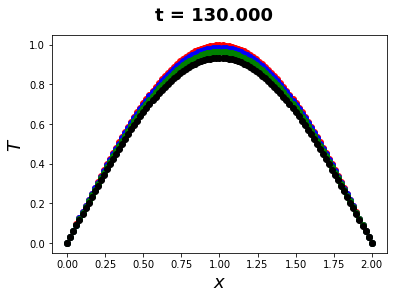

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['or','ob','og','ok']


for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x, Resultado[i],line_style[i], lw = 4)
plt.show()

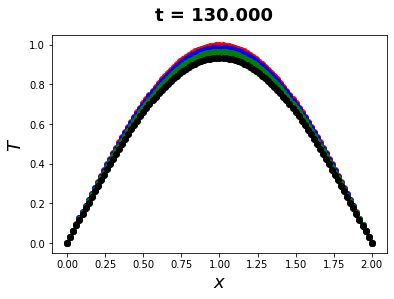

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['or','ob','og','ok']
line_continuos = ['-r','-b','-g','-k']

for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x, Resultado[i],line_style[i], lw = 4)
  plt.plot(x,Resultado[i], line_continuos[i])
plt.show()

In [ ]:
#Resolução Análitica do Exercício 3
resultado_analitico = np.zeros([len(k_final),N])
funcao_analitica = lambda x, t: (e((-(p**2)*t)/4)*np.sin((p/2)*x))
for i in range(len(k_final)):
  for j in range(N):
    resultado_analitico[i][j] = funcao_analitica(x[j], k_final[i])

IndexError: ignored

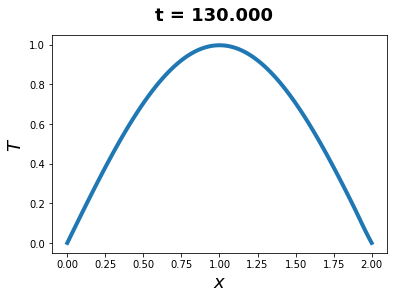

In [ ]:
#Grafico da Resolução Analítica do Exercício 3
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['-b']
for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x,Resultado[i],resultado_analitico[i][j],line_style[i], lw = 4)

plt.show()

In [27]:
#Resolução Análitica do Exercício 4
resultado_analitico = np.zeros([len(k_final),N])
funcao_analitica_exercicio4 = nsum(lambda n : (4/(((2 * n) - 1) * p)) *
                                      mp.sin(((2*n)- 1) * p * x)*
                                      mp.exp(-(((2*n)- 1) ** 2) * (p ** 2) * t),[1, inf])
for i in range(len(k_final)):
  for j in range(N):
    resultado_analitico[i][j] = funcao_analitica_exercicio4(x[j], k_final[i])

TypeError: ignored

IndexError: ignored

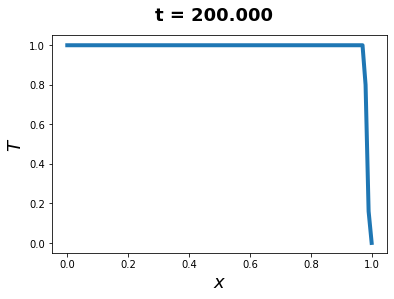

In [28]:
#Grafico da Resolução Analítica do Exercício 4
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['-b']
for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x,Resultado[i],resultado_analitico[i][j],line_style[i], lw = 4)

plt.show()

In [30]:
#Solução Análitica do Exercício 5 
resultado_analitico = np.zeros([len(k_final),N])
funcao_analitica_exercicio5 = 1 - x - nsum(lambda n :(((2 /(n*p))*mp.sin(n*p*x)*mp.exp(-(n**2)*(p**2)*t))), [1, inf])
for i in range(len(k_final)):
  for j in range(N):
    resultado_analitico[i][j] = funcao_analitica_exercicio5(x[j], k_final[i])

TypeError: ignored

IndexError: ignored

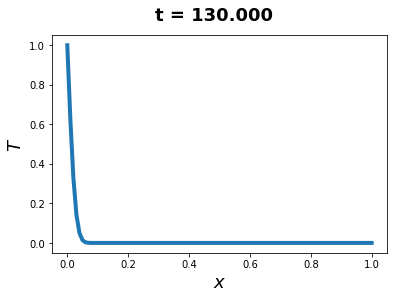

In [31]:
#Grafico da Resolução Analítica do Exercício 5
fig = plt.figure()
ax = fig.add_subplot()
line_style = ['-b']
for i in range(len(Resultado)):
  fig.suptitle('t = %.3f'%k_final[i], fontsize =18, fontweight = 'bold')

ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

for i in range(len(Resultado)):
  plt.plot(x,Resultado[i],resultado_analitico[i][j],line_style[i], lw = 4)

plt.show()